In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix

In [ ]:
weather_df = pd.read_csv('/content/WeatherAUS.csv')

In [ ]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
weather_df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
locations = weather_df['Location'].unique()

In [ ]:
weather_train = pd.DataFrame()
weather_val = pd.DataFrame()
weather_test = pd.DataFrame()

for i in range(49):
  temp_df = pd.DataFrame(weather_df.loc[weather_df['Location'] == locations[i]]).sort_values(by='Date')
  n = int(len(temp_df))
  temp_train = temp_df[0:int(n*0.6)]
  temp_val = temp_df[int(n*0.6):int(n*0.8)]
  temp_test = temp_df[int(n*0.8):]

  weather_train = pd.concat([weather_train, temp_train])
  weather_val = pd.concat([weather_val, temp_val])
  weather_test = pd.concat([weather_test, temp_test])

weather_train


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144823,2015-09-28,Uluru,6.7,29.3,0.0,NaN,NaN,ENE,35.0,E,...,16.0,8.0,1019.9,1015.8,NaN,NaN,21.0,27.3,No,No
144824,2015-09-29,Uluru,8.3,31.5,0.0,NaN,NaN,ENE,39.0,SE,...,14.0,7.0,1020.1,1016.8,NaN,NaN,22.2,30.1,No,No
144825,2015-09-30,Uluru,10.0,34.2,0.0,NaN,NaN,NE,41.0,NaN,...,9.0,6.0,1022.7,1019.8,NaN,NaN,24.3,32.4,No,No
144826,2015-10-01,Uluru,12.3,34.6,0.0,NaN,NaN,ESE,39.0,ESE,...,16.0,7.0,1026.9,1021.7,NaN,NaN,24.8,33.8,No,No


In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87257 entries, 0 to 144827
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           87257 non-null  object 
 1   Location       87257 non-null  object 
 2   MinTemp        86572 non-null  float64
 3   MaxTemp        86770 non-null  float64
 4   Rainfall       85619 non-null  float64
 5   Evaporation    54749 non-null  float64
 6   Sunshine       51401 non-null  float64
 7   WindGustDir    80623 non-null  object 
 8   WindGustSpeed  80663 non-null  float64
 9   WindDir9am     80818 non-null  object 
 10  WindDir3pm     85333 non-null  object 
 11  WindSpeed9am   86106 non-null  float64
 12  WindSpeed3pm   86099 non-null  float64
 13  Humidity9am    85744 non-null  float64
 14  Humidity3pm    85757 non-null  float64
 15  Pressure9am    79209 non-null  float64
 16  Pressure3pm    79237 non-null  float64
 17  Cloud9am       55239 non-null  float64
 18  Cloud

In [ ]:
weather_train.isnull().sum()

Date                 0
Location             0
MinTemp            685
MaxTemp            487
Rainfall          1638
Evaporation      32508
Sunshine         35856
WindGustDir       6634
WindGustSpeed     6594
WindDir9am        6439
WindDir3pm        1924
WindSpeed9am      1151
WindSpeed3pm      1158
Humidity9am       1513
Humidity3pm       1500
Pressure9am       8048
Pressure3pm       8020
Cloud9am         32018
Cloud3pm         33076
Temp9am           1039
Temp3pm            992
RainToday         1638
RainTomorrow      1636
dtype: int64

In [ ]:
weather_train.drop(['Cloud3pm', 'Cloud9am', 'Sunshine', 'Evaporation'], axis=1, inplace = True)

In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87257 entries, 0 to 144827
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           87257 non-null  object 
 1   Location       87257 non-null  object 
 2   MinTemp        86572 non-null  float64
 3   MaxTemp        86770 non-null  float64
 4   Rainfall       85619 non-null  float64
 5   WindGustDir    80623 non-null  object 
 6   WindGustSpeed  80663 non-null  float64
 7   WindDir9am     80818 non-null  object 
 8   WindDir3pm     85333 non-null  object 
 9   WindSpeed9am   86106 non-null  float64
 10  WindSpeed3pm   86099 non-null  float64
 11  Humidity9am    85744 non-null  float64
 12  Humidity3pm    85757 non-null  float64
 13  Pressure9am    79209 non-null  float64
 14  Pressure3pm    79237 non-null  float64
 15  Temp9am        86218 non-null  float64
 16  Temp3pm        86265 non-null  float64
 17  RainToday      85619 non-null  object 
 18  RainT

In [ ]:
weather_train.isnull().sum()

Date                0
Location            0
MinTemp           685
MaxTemp           487
Rainfall         1638
WindGustDir      6634
WindGustSpeed    6594
WindDir9am       6439
WindDir3pm       1924
WindSpeed9am     1151
WindSpeed3pm     1158
Humidity9am      1513
Humidity3pm      1500
Pressure9am      8048
Pressure3pm      8020
Temp9am          1039
Temp3pm           992
RainToday        1638
RainTomorrow     1636
dtype: int64

In [ ]:
weather_train.fillna(weather_train.mean(), inplace = True)

<ipython-input-13-0319d2a8cfb9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_train.fillna(weather_train.mean(), inplace = True)


In [ ]:
weather_train

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144823,2015-09-28,Uluru,6.7,29.3,0.0,ENE,35.0,E,SE,15.0,9.0,16.0,8.0,1019.9,1015.8,21.0,27.3,No,No
144824,2015-09-29,Uluru,8.3,31.5,0.0,ENE,39.0,SE,E,2.0,20.0,14.0,7.0,1020.1,1016.8,22.2,30.1,No,No
144825,2015-09-30,Uluru,10.0,34.2,0.0,NE,41.0,NaN,ENE,0.0,19.0,9.0,6.0,1022.7,1019.8,24.3,32.4,No,No
144826,2015-10-01,Uluru,12.3,34.6,0.0,ESE,39.0,ESE,SSE,15.0,13.0,16.0,7.0,1026.9,1021.7,24.8,33.8,No,No


In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87257 entries, 0 to 144827
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           87257 non-null  object 
 1   Location       87257 non-null  object 
 2   MinTemp        87257 non-null  float64
 3   MaxTemp        87257 non-null  float64
 4   Rainfall       87257 non-null  float64
 5   WindGustDir    80623 non-null  object 
 6   WindGustSpeed  87257 non-null  float64
 7   WindDir9am     80818 non-null  object 
 8   WindDir3pm     85333 non-null  object 
 9   WindSpeed9am   87257 non-null  float64
 10  WindSpeed3pm   87257 non-null  float64
 11  Humidity9am    87257 non-null  float64
 12  Humidity3pm    87257 non-null  float64
 13  Pressure9am    87257 non-null  float64
 14  Pressure3pm    87257 non-null  float64
 15  Temp9am        87257 non-null  float64
 16  Temp3pm        87257 non-null  float64
 17  RainToday      85619 non-null  object 
 18  RainT

In [ ]:
weather_train.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      6634
WindGustSpeed       0
WindDir9am       6439
WindDir3pm       1924
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        1638
RainTomorrow     1636
dtype: int64

In [ ]:
weather_train['WindGustDir'].fillna(weather_train['WindGustDir'].mode()[0], inplace = True)
weather_train['WindDir9am'].fillna(weather_train['WindDir9am'].mode()[0], inplace = True)
weather_train['WindDir3pm'].fillna(weather_train['WindDir3pm'].mode()[0], inplace = True)
weather_train['RainToday'].fillna(weather_train['RainToday'].mode()[0], inplace = True)
weather_train['RainTomorrow'].fillna(weather_train['RainTomorrow'].mode()[0], inplace = True)

In [ ]:
weather_train.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87257 entries, 0 to 144827
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           87257 non-null  object 
 1   Location       87257 non-null  object 
 2   MinTemp        87257 non-null  float64
 3   MaxTemp        87257 non-null  float64
 4   Rainfall       87257 non-null  float64
 5   WindGustDir    87257 non-null  object 
 6   WindGustSpeed  87257 non-null  float64
 7   WindDir9am     87257 non-null  object 
 8   WindDir3pm     87257 non-null  object 
 9   WindSpeed9am   87257 non-null  float64
 10  WindSpeed3pm   87257 non-null  float64
 11  Humidity9am    87257 non-null  float64
 12  Humidity3pm    87257 non-null  float64
 13  Pressure9am    87257 non-null  float64
 14  Pressure3pm    87257 non-null  float64
 15  Temp9am        87257 non-null  float64
 16  Temp3pm        87257 non-null  float64
 17  RainToday      87257 non-null  object 
 18  RainT

In [ ]:
weather_train

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144823,2015-09-28,Uluru,6.7,29.3,0.0,ENE,35.0,E,SE,15.0,9.0,16.0,8.0,1019.9,1015.8,21.0,27.3,No,No
144824,2015-09-29,Uluru,8.3,31.5,0.0,ENE,39.0,SE,E,2.0,20.0,14.0,7.0,1020.1,1016.8,22.2,30.1,No,No
144825,2015-09-30,Uluru,10.0,34.2,0.0,NE,41.0,N,ENE,0.0,19.0,9.0,6.0,1022.7,1019.8,24.3,32.4,No,No
144826,2015-10-01,Uluru,12.3,34.6,0.0,ESE,39.0,ESE,SSE,15.0,13.0,16.0,7.0,1026.9,1021.7,24.8,33.8,No,No


In [ ]:
weather_train.drop(['RainTomorrow'],axis = 1, inplace = True)

In [ ]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
encoder = OrdinalEncoder()
weather_train[cols] = encoder.fit_transform(weather_train[cols])

In [ ]:
# Scaling Train Dataset
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(weather_train[num_cols])
weather_train[num_cols] = scaler.transform(weather_train[num_cols])

In [ ]:
weather_train

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,2.0,0.516509,0.514451,0.001617,13.0,0.294574,13.0,14.0,0.229885,0.275862,0.71,0.22,0.449587,0.463696,0.494577,0.525391,0.0
1,2008-12-02,2.0,0.375000,0.556840,0.000000,14.0,0.294574,6.0,15.0,0.045977,0.252874,0.44,0.25,0.497521,0.475248,0.501085,0.574219,0.0
2,2008-12-03,2.0,0.504717,0.568401,0.000000,15.0,0.310078,13.0,15.0,0.218391,0.298851,0.38,0.30,0.447934,0.490099,0.583514,0.552734,0.0
3,2008-12-04,2.0,0.417453,0.612717,0.000000,4.0,0.139535,9.0,0.0,0.126437,0.103448,0.45,0.16,0.613223,0.557756,0.520607,0.617188,0.0
4,2008-12-05,2.0,0.613208,0.695568,0.002695,13.0,0.271318,1.0,7.0,0.080460,0.229885,0.82,0.33,0.500826,0.445545,0.514100,0.679688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144823,2015-09-28,41.0,0.358491,0.637765,0.000000,1.0,0.224806,0.0,9.0,0.172414,0.103448,0.16,0.08,0.651240,0.607261,0.583514,0.632812,0.0
144824,2015-09-29,41.0,0.396226,0.680154,0.000000,1.0,0.255814,9.0,0.0,0.022989,0.229885,0.14,0.07,0.654545,0.623762,0.609544,0.687500,0.0
144825,2015-09-30,41.0,0.436321,0.732177,0.000000,4.0,0.271318,3.0,1.0,0.000000,0.218391,0.09,0.06,0.697521,0.673267,0.655098,0.732422,0.0
144826,2015-10-01,41.0,0.490566,0.739884,0.000000,2.0,0.255814,2.0,10.0,0.172414,0.149425,0.16,0.07,0.766942,0.704620,0.665944,0.759766,0.0


In [ ]:
weather_val

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1824,2014-02-26,Albury,17.5,31.4,0.0,NaN,NaN,WSW,41.0,NaN,...,74.0,45.0,1009.5,1008.1,NaN,8.0,20.2,30.1,No,No
1825,2014-02-27,Albury,10.8,30.6,0.0,NaN,NaN,SW,33.0,SSE,...,66.0,25.0,1016.7,1014.9,NaN,NaN,17.5,29.5,No,No
1826,2014-02-28,Albury,16.4,27.7,0.0,NaN,NaN,NNE,31.0,SSE,...,58.0,47.0,1020.2,1019.2,2.0,8.0,19.6,26.3,No,Yes
1827,2014-03-01,Albury,17.0,27.2,8.8,NaN,NaN,NE,50.0,NaN,...,94.0,54.0,1020.9,1018.0,8.0,6.0,18.5,25.0,Yes,No
1828,2014-03-02,Albury,15.8,30.0,0.0,NaN,NaN,NE,20.0,S,...,83.0,36.0,1020.5,1018.4,1.0,NaN,19.0,27.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145139,2016-08-09,Uluru,12.9,25.2,0.0,NaN,NaN,NNW,44.0,W,...,51.0,36.0,1018.0,1015.5,8.0,NaN,19.4,23.5,No,No
145140,2016-08-10,Uluru,8.0,21.6,0.0,NaN,NaN,SSE,48.0,ESE,...,49.0,27.0,1021.1,1018.4,1.0,1.0,13.8,21.4,No,No
145141,2016-08-11,Uluru,4.9,21.5,0.0,NaN,NaN,E,46.0,E,...,49.0,19.0,1024.7,1020.1,NaN,NaN,10.8,21.0,No,No
145142,2016-08-12,Uluru,4.7,26.4,0.0,NaN,NaN,W,33.0,SE,...,42.0,24.0,1021.3,1017.1,NaN,NaN,11.6,25.0,No,No


In [ ]:
#drop unused and high nan features
weather_val.drop(['Cloud3pm', 'Cloud9am', 'Sunshine', 'Evaporation'], axis=1, inplace = True)
weather_val.drop(['RainTomorrow'],axis = 1, inplace = True)

#fill Nulls with mean and mode
weather_val.fillna(weather_val.mean(), inplace = True)

weather_val['WindGustDir'].fillna(weather_val['WindGustDir'].mode()[0], inplace = True)
weather_val['WindDir9am'].fillna(weather_val['WindDir9am'].mode()[0], inplace = True)
weather_val['WindDir3pm'].fillna(weather_val['WindDir3pm'].mode()[0], inplace = True)
weather_val['RainToday'].fillna(weather_val['RainToday'].mode()[0], inplace = True)

#encode
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
encoder = OrdinalEncoder()
weather_val[cols] = encoder.fit_transform(weather_val[cols])

# Scaling Train Dataset
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(weather_val[num_cols])
weather_val[num_cols] = scaler.transform(weather_val[num_cols])

<ipython-input-26-e7849d08e352>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_val.fillna(weather_val.mean(), inplace = True)


In [ ]:
weather_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2432,2015-10-27,Albury,13.6,25.3,0.0,NaN,NaN,SE,48.0,SE,...,41.0,30.0,1024.1,1021.9,NaN,NaN,15.8,23.8,No,No
2433,2015-10-28,Albury,6.2,25.5,0.0,NaN,NaN,NE,19.0,ENE,...,54.0,29.0,1025.0,1019.5,NaN,NaN,14.8,23.6,No,No
2434,2015-10-29,Albury,9.3,27.9,0.0,NaN,NaN,SE,22.0,ESE,...,55.0,22.0,1021.7,1018.7,NaN,NaN,18.5,27.2,No,No
2435,2015-10-30,Albury,9.7,28.1,0.0,NaN,NaN,ENE,28.0,SE,...,59.0,36.0,1020.6,1016.7,NaN,7.0,17.8,27.2,No,Yes
2436,2015-10-31,Albury,17.1,21.7,5.4,NaN,NaN,ENE,28.0,SE,...,90.0,77.0,1017.3,1015.1,7.0,8.0,18.2,19.2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
#drop unused and high nan features
weather_test.drop(['Cloud3pm', 'Cloud9am', 'Sunshine', 'Evaporation'], axis=1, inplace = True)
weather_test.drop(['RainTomorrow'],axis = 1, inplace = True)

#fill Nulls with mean and mode
weather_test.fillna(weather_test.mean(), inplace = True)

weather_test['WindGustDir'].fillna(weather_test['WindGustDir'].mode()[0], inplace = True)
weather_test['WindDir9am'].fillna(weather_test['WindDir9am'].mode()[0], inplace = True)
weather_test['WindDir3pm'].fillna(weather_test['WindDir3pm'].mode()[0], inplace = True)
weather_test['RainToday'].fillna(weather_test['RainToday'].mode()[0], inplace = True)

#encode
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
encoder = OrdinalEncoder()
weather_test[cols] = encoder.fit_transform(weather_test[cols])

# Scaling Train Dataset
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(weather_test[num_cols])
weather_test[num_cols] = scaler.transform(weather_test[num_cols])

<ipython-input-28-08616209ed9f>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather_test.fillna(weather_test.mean(), inplace = True)


In [ ]:
weather_test

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
2432,2015-10-27,2.0,0.539043,0.577735,0.000,9.0,0.356522,9.0,9.0,0.200000,0.261538,0.385417,0.278351,0.722127,0.751678,0.513393,0.560461,0.0
2433,2015-10-28,2.0,0.352645,0.581574,0.000,4.0,0.104348,1.0,11.0,0.046154,0.169231,0.520833,0.268041,0.737564,0.711409,0.491071,0.556622,0.0
2434,2015-10-29,2.0,0.430730,0.627639,0.000,9.0,0.130435,2.0,10.0,0.069231,0.230769,0.531250,0.195876,0.680961,0.697987,0.573661,0.625720,0.0
2435,2015-10-30,2.0,0.440806,0.631478,0.000,1.0,0.182609,9.0,0.0,0.069231,0.261538,0.572917,0.340206,0.662093,0.664430,0.558036,0.625720,0.0
2436,2015-10-31,2.0,0.627204,0.508637,0.024,1.0,0.182609,9.0,4.0,0.115385,0.292308,0.895833,0.762887,0.605489,0.637584,0.566964,0.472169,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41.0,0.267003,0.541267,0.000,0.0,0.208696,9.0,1.0,0.100000,0.169231,0.489583,0.216495,0.730703,0.724832,0.386161,0.533589,0.0
145456,2017-06-22,41.0,0.287154,0.577735,0.000,6.0,0.130435,9.0,3.0,0.100000,0.138462,0.541667,0.185567,0.711835,0.704698,0.404018,0.573896,0.0
145457,2017-06-23,41.0,0.332494,0.608445,0.000,3.0,0.260870,9.0,14.0,0.069231,0.138462,0.510417,0.216495,0.668954,0.666107,0.439732,0.604607,0.0
145458,2017-06-24,41.0,0.392947,0.610365,0.000,9.0,0.182609,10.0,3.0,0.100000,0.107692,0.489583,0.216495,0.641509,0.661074,0.497768,0.602687,0.0


In [ ]:
weather_train.drop(['Date'], axis =1, inplace = True)
weather_val.drop(['Date'], axis =1, inplace = True)
weather_test.drop(['Date'], axis =1, inplace = True)


In [ ]:
weather_train = weather_train.reset_index(drop=True)
weather_val = weather_val.reset_index(drop=True)
weather_test = weather_test.reset_index(drop=True)

In [ ]:
weather_train.shape

(87257, 17)

In [ ]:
weather_train


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2.0,0.516509,0.514451,0.001617,13.0,0.294574,13.0,14.0,0.229885,0.275862,0.71,0.22,0.449587,0.463696,0.494577,0.525391,0.0
1,2.0,0.375000,0.556840,0.000000,14.0,0.294574,6.0,15.0,0.045977,0.252874,0.44,0.25,0.497521,0.475248,0.501085,0.574219,0.0
2,2.0,0.504717,0.568401,0.000000,15.0,0.310078,13.0,15.0,0.218391,0.298851,0.38,0.30,0.447934,0.490099,0.583514,0.552734,0.0
3,2.0,0.417453,0.612717,0.000000,4.0,0.139535,9.0,0.0,0.126437,0.103448,0.45,0.16,0.613223,0.557756,0.520607,0.617188,0.0
4,2.0,0.613208,0.695568,0.002695,13.0,0.271318,1.0,7.0,0.080460,0.229885,0.82,0.33,0.500826,0.445545,0.514100,0.679688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87252,41.0,0.358491,0.637765,0.000000,1.0,0.224806,0.0,9.0,0.172414,0.103448,0.16,0.08,0.651240,0.607261,0.583514,0.632812,0.0
87253,41.0,0.396226,0.680154,0.000000,1.0,0.255814,9.0,0.0,0.022989,0.229885,0.14,0.07,0.654545,0.623762,0.609544,0.687500,0.0
87254,41.0,0.436321,0.732177,0.000000,4.0,0.271318,3.0,1.0,0.000000,0.218391,0.09,0.06,0.697521,0.673267,0.655098,0.732422,0.0
87255,41.0,0.490566,0.739884,0.000000,2.0,0.255814,2.0,10.0,0.172414,0.149425,0.16,0.07,0.766942,0.704620,0.665944,0.759766,0.0


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i+look_back]['RainToday'])

    return np.array(dataX), np.array(dataY)

def LSTM_model(train, val, test, look_back):
  X_train_weather, y_train_weather = create_dataset(weather_train, look_back)
  X_val_weather, y_val_weather = create_dataset(weather_val, look_back)
  X_test_weather, y_test_weather = create_dataset(weather_test, look_back)


  lstm_model = Sequential()
  lstm_model.add(LSTM(100, input_shape=(X_train_weather.shape[1], X_train_weather.shape[2])))
  lstm_model.add(Dropout(0.2))
  #    lstm_model.add(LSTM(70))
  #    lstm_model.add(Dropout(0.3))
  lstm_model.add(Dense(1, activation='sigmoid'))
  lstm_model.compile(loss='binary_crossentropy',
                    optimizer='rmsprop',
                    metrics=['accuracy'])


  lstm_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

  # fit network
  lstm_history = lstm_model.fit(X_train_weather, y_train_weather, epochs=20, batch_size=70, callbacks=[lstm_callback], validation_data=(X_val_weather, y_val_weather), verbose=2, shuffle=False)
  plt.plot(lstm_history.history['loss'])
  plt.plot(lstm_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()


  yhat = lstm_model.predict(X_test_weather)
  for i in range(len(yhat)):
    if yhat[i][0]>=0.5:
      yhat[i][0] = 1
    else:
      yhat[i][0] = 0


  cm= confusion_matrix(y_test_weather, yhat)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()




  print(classification_report(y_test_weather, yhat))




Epoch 1/20
1247/1247 - 8s - loss: 0.4449 - accuracy: 0.8029 - val_loss: 0.4301 - val_accuracy: 0.8158 - 8s/epoch - 6ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3812 - accuracy: 0.8363 - val_loss: 0.3913 - val_accuracy: 0.8328 - 6s/epoch - 4ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3698 - accuracy: 0.8419 - val_loss: 0.3851 - val_accuracy: 0.8364 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3652 - accuracy: 0.8446 - val_loss: 0.3816 - val_accuracy: 0.8374 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3628 - accuracy: 0.8451 - val_loss: 0.3801 - val_accuracy: 0.8377 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3605 - accuracy: 0.8460 - val_loss: 0.3805 - val_accuracy: 0.8390 - 6s/epoch - 5ms/step
Epoch 7/20
1247/1247 - 6s - loss: 0.3582 - accuracy: 0.8476 - val_loss: 0.3809 - val_accuracy: 0.8389 - 6s/epoch - 5ms/step
Epoch 8/20
1247/1247 - 6s - loss: 0.3565 - accuracy: 0.8473 - val_loss: 0.3805 - val_accuracy: 0.8384 - 6s/epoch - 5ms/step


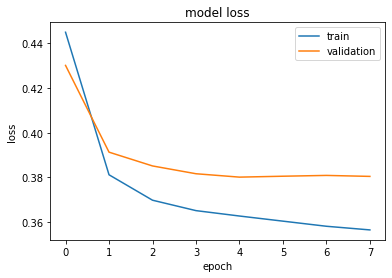

910/910 [==============================] - 2s 2ms/step


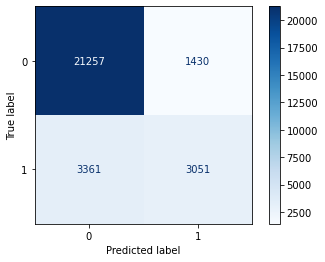

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22687
         1.0       0.68      0.48      0.56      6412

    accuracy                           0.84     29099
   macro avg       0.77      0.71      0.73     29099
weighted avg       0.82      0.84      0.82     29099

Epoch 1/20
1247/1247 - 8s - loss: 0.4506 - accuracy: 0.8001 - val_loss: 0.4456 - val_accuracy: 0.8084 - 8s/epoch - 6ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3818 - accuracy: 0.8353 - val_loss: 0.3906 - val_accuracy: 0.8332 - 6s/epoch - 5ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3684 - accuracy: 0.8433 - val_loss: 0.3850 - val_accuracy: 0.8360 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3643 - accuracy: 0.8439 - val_loss: 0.3799 - val_accuracy: 0.8377 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3609 - accuracy: 0.8455 - val_loss: 0.3808 - val_accuracy: 0.8385 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3596 - accuracy: 

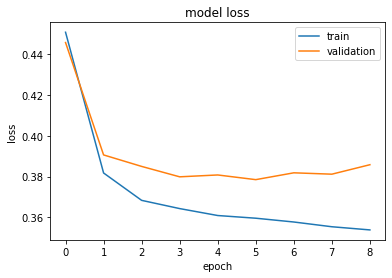

910/910 [==============================] - 2s 2ms/step


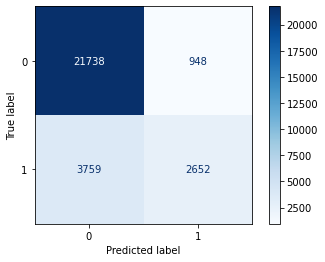

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22686
         1.0       0.74      0.41      0.53      6411

    accuracy                           0.84     29097
   macro avg       0.79      0.69      0.72     29097
weighted avg       0.83      0.84      0.82     29097

Epoch 1/20
1247/1247 - 8s - loss: 0.4430 - accuracy: 0.8030 - val_loss: 0.4240 - val_accuracy: 0.8165 - 8s/epoch - 7ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3798 - accuracy: 0.8359 - val_loss: 0.3892 - val_accuracy: 0.8334 - 6s/epoch - 5ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3684 - accuracy: 0.8425 - val_loss: 0.3842 - val_accuracy: 0.8356 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3652 - accuracy: 0.8432 - val_loss: 0.3807 - val_accuracy: 0.8371 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3616 - accuracy: 0.8457 - val_loss: 0.3777 - val_accuracy: 0.8384 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3582 - accuracy: 

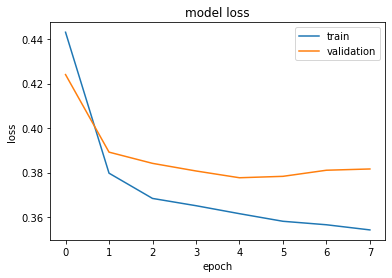

910/910 [==============================] - 2s 2ms/step


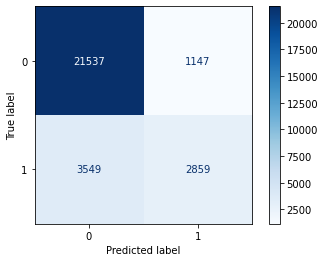

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22684
         1.0       0.71      0.45      0.55      6408

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



In [ ]:
for look_back in [3, 5, 10]:
  LSTM_model(weather_train, weather_val, weather_test, look_back)

In [ ]:
def GRU_model(train, val, test, look_back):
  X_train_weather, y_train_weather = create_dataset(weather_train, look_back)
  X_val_weather, y_val_weather = create_dataset(weather_val, look_back)
  X_test_weather, y_test_weather = create_dataset(weather_test, look_back)


  gru_model = Sequential()
  gru_model.add(LSTM(100, input_shape=(X_train_weather.shape[1], X_train_weather.shape[2])))
  gru_model.add(Dropout(0.2))
  #    gru_model.add(LSTM(70))
  #    gru_model.add(Dropout(0.3))
  gru_model.add(Dense(1, activation='sigmoid'))
  gru_model.compile(loss='binary_crossentropy',
                    optimizer='rmsprop',
                    metrics=['accuracy'])
  gru_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
  # fit network
  gru_history = gru_model.fit(X_train_weather, y_train_weather, epochs=20, batch_size=70, callbacks =[gru_callback], validation_data=(X_val_weather, y_val_weather), verbose=2, shuffle=False)
  plt.plot(gru_history.history['loss'])
  plt.plot(gru_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()


  yhat = gru_model.predict(X_test_weather)
  for i in range(len(yhat)):
    if yhat[i][0]>=0.5:
      yhat[i][0] = 1
    else:
      yhat[i][0] = 0


  cm= confusion_matrix(y_test_weather, yhat)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  disp.plot(cmap=plt.cm.Blues)
  plt.show()




  print(classification_report(y_test_weather, yhat))

Epoch 1/20
1247/1247 - 8s - loss: 0.4441 - accuracy: 0.8029 - val_loss: 0.4265 - val_accuracy: 0.8177 - 8s/epoch - 6ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3788 - accuracy: 0.8377 - val_loss: 0.3896 - val_accuracy: 0.8338 - 6s/epoch - 5ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3685 - accuracy: 0.8428 - val_loss: 0.3826 - val_accuracy: 0.8363 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3642 - accuracy: 0.8445 - val_loss: 0.3805 - val_accuracy: 0.8385 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3616 - accuracy: 0.8460 - val_loss: 0.3800 - val_accuracy: 0.8389 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3599 - accuracy: 0.8461 - val_loss: 0.3804 - val_accuracy: 0.8395 - 6s/epoch - 5ms/step
Epoch 7/20
1247/1247 - 6s - loss: 0.3582 - accuracy: 0.8469 - val_loss: 0.3779 - val_accuracy: 0.8400 - 6s/epoch - 5ms/step
Epoch 8/20
1247/1247 - 6s - loss: 0.3566 - accuracy: 0.8490 - val_loss: 0.3790 - val_accuracy: 0.8387 - 6s/epoch - 4ms/step
Epoch 9/

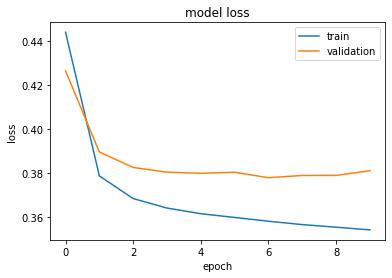

910/910 [==============================] - 2s 2ms/step


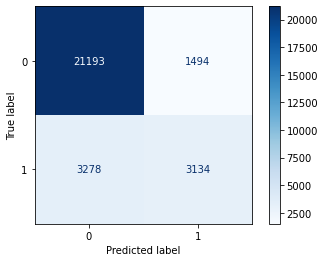

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     22687
         1.0       0.68      0.49      0.57      6412

    accuracy                           0.84     29099
   macro avg       0.77      0.71      0.73     29099
weighted avg       0.82      0.84      0.83     29099

Epoch 1/20
1247/1247 - 8s - loss: 0.4496 - accuracy: 0.8009 - val_loss: 0.4475 - val_accuracy: 0.8104 - 8s/epoch - 6ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3829 - accuracy: 0.8348 - val_loss: 0.3923 - val_accuracy: 0.8332 - 6s/epoch - 5ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3692 - accuracy: 0.8421 - val_loss: 0.3870 - val_accuracy: 0.8357 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3653 - accuracy: 0.8438 - val_loss: 0.3853 - val_accuracy: 0.8367 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3624 - accuracy: 0.8450 - val_loss: 0.3816 - val_accuracy: 0.8365 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3593 - accuracy: 

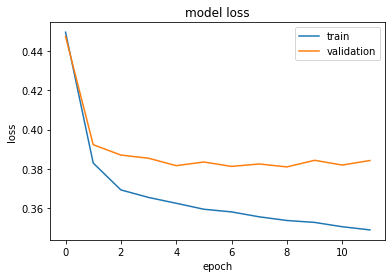

910/910 [==============================] - 2s 2ms/step


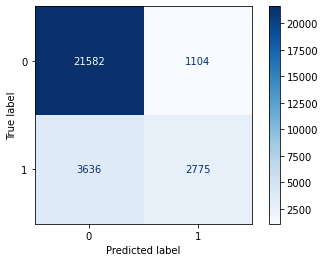

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22686
         1.0       0.72      0.43      0.54      6411

    accuracy                           0.84     29097
   macro avg       0.79      0.69      0.72     29097
weighted avg       0.82      0.84      0.82     29097

Epoch 1/20
1247/1247 - 8s - loss: 0.4503 - accuracy: 0.8009 - val_loss: 0.4317 - val_accuracy: 0.8114 - 8s/epoch - 6ms/step
Epoch 2/20
1247/1247 - 6s - loss: 0.3822 - accuracy: 0.8353 - val_loss: 0.3906 - val_accuracy: 0.8317 - 6s/epoch - 5ms/step
Epoch 3/20
1247/1247 - 6s - loss: 0.3692 - accuracy: 0.8422 - val_loss: 0.3859 - val_accuracy: 0.8344 - 6s/epoch - 5ms/step
Epoch 4/20
1247/1247 - 6s - loss: 0.3639 - accuracy: 0.8450 - val_loss: 0.3827 - val_accuracy: 0.8361 - 6s/epoch - 5ms/step
Epoch 5/20
1247/1247 - 6s - loss: 0.3610 - accuracy: 0.8461 - val_loss: 0.3801 - val_accuracy: 0.8387 - 6s/epoch - 5ms/step
Epoch 6/20
1247/1247 - 6s - loss: 0.3585 - accuracy: 

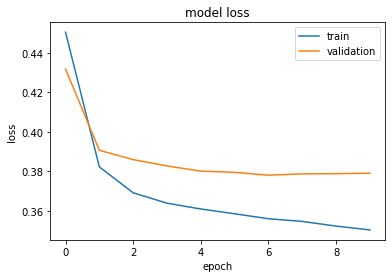

910/910 [==============================] - 2s 2ms/step


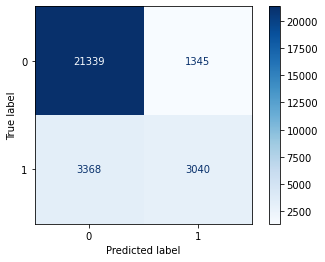

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22684
         1.0       0.69      0.47      0.56      6408

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [ ]:
for look_back in [3, 5, 10]:
  GRU_model(weather_train, weather_val, weather_test, look_back)